In [9]:
from sklearn.datasets import load_digits as digits

x = digits().images
y = digits().target

In [11]:
x[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [12]:
y[0]

0

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

0


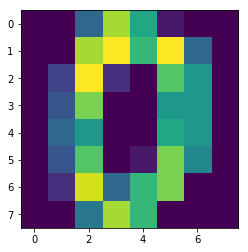

In [19]:
plt.imshow(x[0])
print(y[0])

5


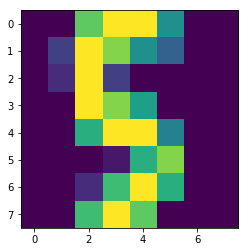

In [20]:
plt.imshow(x[102])
print(y[102])

In [23]:
x.shape

(1797, 8, 8)

In [26]:
x[0].shape

(8, 8)

In [35]:
from numpy import *

print(x[0][0:4])
print(x[0][4:8])

total = sum(x[0])
total

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]]
[[  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


294.0

In [41]:
top = sum(x[0][0:4])/total
bot = sum(x[0][4:8])/total

print(top)
print(bot)

0.534013605442
0.465986394558


In [49]:
left = sum(x[0].T[0:4])/total
right = sum(x[0].T[4:8])/total

zeroes = len(where(x[0]==0)[0])/(8*8)

In [52]:
features = []

for image in x:
    total = sum(image)
    
    top = sum(image[0:4])/total
    bot = sum(image[4:8])/total

    left = sum(image.T[0:4])/total
    right = sum(image.T[4:8])/total

    zeroes = len(where(image==0)[0])/(8*8)
    
    image_features = [total, top, bot, left, right, zeroes]
    features.append(image_features)

In [56]:
x_features = array(features)

In [88]:
from sklearn.model_selection import train_test_split as holdout

x_f_train, x_f_test, y_f_train, y_f_test = holdout(x_features, y, test_size = 0.2)

In [89]:
x_f_test

array([[  3.29000000e+02,   3.73860182e-01,   6.26139818e-01,
          4.83282675e-01,   5.16717325e-01,   5.00000000e-01],
       [  2.82000000e+02,   3.47517730e-01,   6.52482270e-01,
          5.17730496e-01,   4.82269504e-01,   5.15625000e-01],
       [  3.16000000e+02,   5.12658228e-01,   4.87341772e-01,
          2.75316456e-01,   7.24683544e-01,   5.46875000e-01],
       ..., 
       [  3.11000000e+02,   3.21543408e-01,   6.78456592e-01,
          5.43408360e-01,   4.56591640e-01,   5.78125000e-01],
       [  2.76000000e+02,   4.34782609e-01,   5.65217391e-01,
          3.91304348e-01,   6.08695652e-01,   5.78125000e-01],
       [  3.47000000e+02,   5.47550432e-01,   4.52449568e-01,
          4.32276657e-01,   5.67723343e-01,   4.37500000e-01]])

In [90]:
from sklearn.ensemble import RandomForestClassifier as rfc

model_features = rfc(n_jobs = -1, n_estimators = 1)
model_features.fit(x_f_train, y_f_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
sum(y_f_test==model_features.predict(x_f_test))/len(x_f_test)

0.41111111111111109

In [92]:
from sklearn.ensemble import RandomForestClassifier as rfc

model_features = rfc(n_jobs = -1, n_estimators = 1000)
model_features.fit(x_f_train, y_f_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
sum(y_f_test==model_features.predict(x_f_test))/len(x_f_test)

0.49166666666666664

In [100]:
x[0].reshape(-1)

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [106]:
x.reshape(len(x),-1)

x_flatten = x.reshape(len(x),-1)

In [108]:
x_flatten[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [110]:
x_fl_train, x_fl_test, y_fl_train, y_fl_test = holdout(x_flatten, y, test_size = 0.2)

model_flatten= rfc(n_jobs = -1, n_estimators = 1000)
model_flatten.fit(x_fl_train, y_fl_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
sum(y_fl_test==model_flatten.predict(x_fl_test))/len(x_fl_test)

0.97222222222222221

In [118]:
x[0][0:4].T[0:4].T

array([[  0.,   0.,   5.,  13.],
       [  0.,   0.,  13.,  15.],
       [  0.,   3.,  15.,   2.],
       [  0.,   4.,  12.,   0.]])

In [119]:
x[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [141]:
first = convolve(x[0][0:4].T[0:4].T.reshape(-1), x[0].reshape(-1))
first

array([   0.,    0.,    0.,    0.,   25.,  130.,  214.,  122.,   78.,
        244.,  312.,  163.,  194.,  476.,  409.,  258.,  503.,  647.,
        467.,  411.,  644.,  561.,  251.,  406.,  744.,  585.,  219.,
        453.,  678.,  336.,   49.,  377.,  690.,  324.,   56.,  389.,
        613.,  248.,   40.,  350.,  616.,  240.,   47.,  364.,  572.,
        279.,   52.,  376.,  628.,  272.,   61.,  414.,  636.,  337.,
        182.,  511.,  629.,  293.,  271.,  550.,  523.,  276.,  423.,
        410.,  290.,  359.,  493.,  312.,  129.,  237.,  176.,   44.,
        124.,  196.,  120.,    0.,    0.,    0.,    0.])

In [142]:
convolutions = []

for image in x:
    convolutions.append(convolve(image[0:4].T[0:4].T.reshape(-1), image.reshape(-1)))

In [131]:
convolutions = array(convolutions)

In [132]:
convolutions.shape

(1797, 79)

In [134]:
x_fl_test.shape

(360, 64)

In [135]:
x_c_train, x_c_test, y_c_train, y_c_test = holdout(convolutions, y, test_size = 0.2)

model_convolutions= rfc(n_jobs = -1, n_estimators = 1000)
model_convolutions.fit(x_c_train, y_c_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
sum(y_c_test==model_convolutions.predict(x_c_test))/len(x_c_test)

0.94444444444444442

In [146]:
first = convolve(x[0][0:3].T[0:3].T.reshape(-1), x[0].reshape(-1), 'valid')
first

array([ 169.,  132.,  127.,  222.,  203.,   90.,   50.,  244.,  220.,
        169.,  435.,  335.,  270.,  250.,  114.,  250.,   75.,   90.,
        374.,  154.,   93.,  189.,  172.,  196.,   52.,   96.,  284.,
        129.,   64.,  144.,  185.,  149.,   55.,   99.,  237.,  124.,
         82.,  159.,  177.,  203.,   47.,  106.,  321.,  104.,  121.,
        226.,  181.,  242.,   71.,  202.,  381.,  105.,  216.,  245.,
         50.,   78.])

In [154]:
second = first[0:int(len(first)/4)]
last = convolve(second, first, 'valid')

In [156]:
convolutions_two = []

for image in x:
    first = convolve(image[0:3].T[0:3].T.reshape(-1), image.reshape(-1), 'valid')
    second = first[0:int(len(first)/4)]
    last = convolve(second, first, 'valid')
    convolutions_two.append(last)
    
convolutions_two = array(convolutions_two)

In [167]:
sum(convolutions_two, 1).shape

(1797,)

In [200]:
convolutions_two = convolutions_two.reshape(len(x),-1)

together = hstack((x_flatten, convolutions, convolutions_two))

In [215]:
x_train, x_test, y_train, y_test = holdout(together, y, test_size = 0.2)

model = rfc(n_jobs = -1, n_estimators = 100)
model.fit(x_train, y_train)

sum(y_test==model.predict(x_test))/len(x_test)

0.96111111111111114